In [17]:
# A priori, pas besoin des imports des helpers.
#Le but de notre code doit être de créer un fichier qui sera passé en argument au helper
# client.py qui redonnera le fichier output. Notre code est donc indépendant du leur.

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import helper as hp

In [26]:
# Idée: encoder le fichier-source bit par bit avec un vecteur de base à 4 fréquences

# Bandes fréquence: 1000 à 3000, 3000 à 5000, 5000 à 7000, 7000 à 9000
# Sampling rate: 22050

In [27]:
def phiGenerator(n, base, deviation, samplingRate):
    return np.cos(2*np.pi*base*n) \
    + np.cos(2*np.pi*(base + deviation)*n/samplingRate) \
    + np.cos(2*np.pi*(base + 2*deviation)*n/samplingRate) \
    + np.cos(2*np.pi*(base + 3*deviation)*n/samplingRate)

In [28]:
BASE = 2000
DEVIATION = 2000
SAMPLING_RATE = 22050

def phi(n):
    return phiGenerator(n, base = BASE, deviation = DEVIATION, samplingRate=SAMPLING_RATE)

In [ ]:
def encoder(bool_message, samples_per_symbol):
    
    result = []
    
    for s in bool_message:
        for i in range(samples_per_symbol): # range est exclusif: va de 0 à n-1, soit n symboles en tout
            result.append((1 if s else -1)*phi(i))
    
    return result

In [29]:
def generic_encoder(bool_message, samples_per_symbol, f):
    
    result = []
    
    for s in bool_message:
        for i in range(samples_per_symbol): # range est exclusif: va de 0 à n-1, soit n symboles en tout
            result.append((1 if s else -1)*f(i))
    
    return result

In [ ]:
def decoder(float_message, samples_per_symbol, length_of_bool_message):
    
    
    result = []
    
    #assert len(float_message)%samples_per_symbol == 0
    #length = int(len(float_message)/samples_per_symbol)
    length = length_of_bool_message
    
    decoding_vector = encoder([True],samples_per_symbol)
    
    for i in range(length):
        
        currentSymbol = float_message[i*samples_per_symbol:(i+1)*samples_per_symbol]
        
        y = np.dot(decoding_vector, currentSymbol)
        
        result.append(y>0)
    
    return result

In [63]:
# Ce decoder utilise un bandpass filter pour tenter d'isoler les fréquences de chaque cos
# et base sa décision sur les 4 cos
def decoder2(float_message, samples_per_symbol, length_of_bool_message):

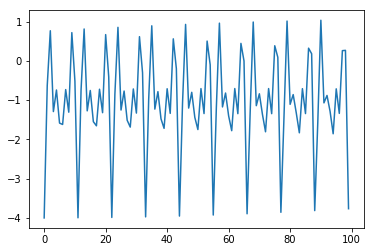

In [70]:
#test_message = [True, True, False, True, False, False, False, True]

test_message = hp.read_file("test_file.txt")

SAMPLES_PER_SYMBOL = 1000

sent_test_message = encoder(test_message, SAMPLES_PER_SYMBOL)

plt.plot(np.arange(0,100,1), sent_test_message[:100])

fd = open("test_message.txt", "w")
for fl in sent_test_message:
    fd.write(str(fl))
    fd.write(" ")
    
fd.close()

#python client.py --input_file=test_message.txt --output_file=result_test.txt --srv_hostname=iscsrv72.epfl.ch --srv_port=80


888000
7285074


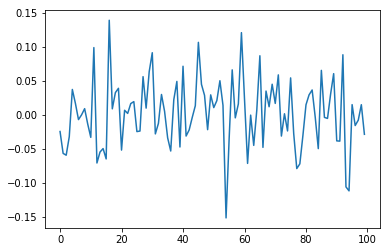

In [71]:

result_message = []

with open("result_test.txt","r") as fr:  
    for cnt, line in enumerate(fr):
        result_message.append(float(line))

fr.close()

plt.plot(np.arange(0,100,1), result_message[:100])

print(len(sent_test_message))
print(len(result_message))

recieved_test_message = decoder(result_message, SAMPLES_PER_SYMBOL, len(test_message))

#print(recieved_test_message)

hp.write_file(recieved_test_message, "result_file.txt")

In [1]:
# Ca n'a pas l'air de bien marcher pour l'instant. Il est probable que le match filter sur une sortie altérée fasse
# n'importe quoi car tous les signes sont modifiés par la suppression d'un des cosinus.
# L'idée serait donc de procéder à une démodulation sale via un bandpass filter pour isoler chaque cos séparément
# puis à faire un match filter sur chaque cosinus isolé (l'un sera nul)
# puis à sélectionner les 3 cos pertinents pour prendre une décision.

In [4]:
def high_order(f):
  
    def f(x):
        return 2*x
    
    return f


high_order(f)(2)

4